# **Numerical Methods Assignment_1**


*   *Lakkoju Vikranth Ram* *ES23BTECH11024*
*   *Chilukala Jayanth Kumar Reddy* *CO23BTECH11005*
*   *Kowsith* *ES23BTECH11015*
*   *Sathwik* *ES23BTECH11020*
*   *Deepak Joy* *ES23BTECH11014*



We are taking input P from the user

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Given differential equation
P = int(input("Enter the value of P")) # Constant value of P

Enter the value of P10


$
u = \frac{U}{U_0}, \quad y = \frac{Y}{L}, \quad P = -\frac{1}{U_0} \left( \frac{dp}{dX} \right) \frac{L^2}{\mu}
$  

 which yeilds $\frac{d^2 u}{dy^2} = -P$

Where u=0 for y=0 and u=1 for y=1

Converting BVP to first-order ODEs:

 y'(x) = z(x) , z'(x) = f(x, y, z).

 Explicit Euler method:

$ y_{n+1} = y_n + h \cdot z_n,$

$z_{n+1} = z_n + h \cdot f(x_n, y_n, z_n).$





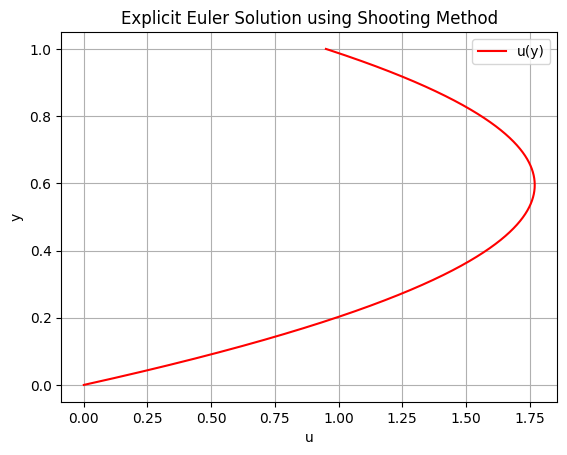

In [ ]:
# Given differential equations
def f(y, x):
    y1, y2 = y
    P = 1  # Constant value of P
    return [y2, -P]
y_0 = 0
y_1_target = 1

# Define the explicit Euler method
def explicit_eulerr(y1_0, y1_0_prime, P, x0, xf, N):
    h = (xf - x0) / N
    x = np.linspace(x0, xf, N + 1)
    y = np.zeros((N + 1, 2))
    y[0, 0] = y1_0
    y[0, 1] = y1_0_prime

    for i in range(N):
        y[i + 1, 0] = y[i, 0] + h * y[i, 1]
        y[i + 1, 1] = y[i, 1] - h * P  # Update derivative (y2)

    return x, y

# Define the bisection method for shooting
def shooting(tol=1e-6, max_iter=10000):
    der_y_guess1 = 0
    der_y_guess2 = 10
    for i in range(max_iter):
        # Calculate y(1) using explicit Euler with each guess
        _, y_end1 = explicit_eulerr(y_0, der_y_guess1, P, 0, 1, 100)
        _, y_end2 = explicit_eulerr(y_0, der_y_guess2, P, 0, 1, 100)

        # Extend range if initial guesses are not bracketing the target value
        if y_end1[-1, 0] > y_1_target:
            der_y_guess1 -= 10
            continue
        if y_end2[-1, 0] < y_1_target:
            der_y_guess2 += 10
            continue

        # Bisection method to refine the derivative guess
        der_y_guess = (der_y_guess1 + der_y_guess2) / 2
        _, y_end = explicit_eulerr(y_0, der_y_guess, P, 0, 1, 100)

        # Check convergence
        if abs(y_end[-1, 0] - y_1_target) < tol:
            return der_y_guess

        # Narrow down the bracket based on the current guess
        if y_end[-1, 0] < y_1_target:
            der_y_guess1 = der_y_guess
        else:
            der_y_guess2 = der_y_guess

    # Return final estimate if max_iter is reached without exact convergence
    return der_y_guess

# Solve using the computed initial derivative from shooting method
yprime_0 = shooting()

# Solve the differential equation using explicit Euler with the found initial derivative
x, y = explicit_eulerr(y_0, yprime_0, P, 0, 1, 10000)

# Plotting
plt.plot(y[:, 0],x , label='u(y)',color='r')
plt.xlabel('u')
plt.ylabel('y')
plt.title("Explicit Euler Solution using Shooting Method")
plt.legend()
plt.grid()
plt.show()


Initial Value Problem (IVP) Setup
$
\frac{dy_1}{dx} = y_2, \quad \frac{dy_2}{dx} = f(x, y_1, y_2), \quad y_1(a) = \alpha.$

Implicit Euler Method
$
y_{i+1} = y_i + h \cdot f(x_{i+1}, y_{i+1}),
$

$
y_{1, i+1} = y_{1, i} + h \cdot y_{2, i+1},
$

$
y_{2, i+1} = y_{2, i} + h \cdot f(x_{i+1}, y_{1, i+1}, y_{2, i+1}).
$


In [ ]:
# Function defining the differential equations
def f(y, x):
    y1, y2 = y
    return np.array([y2, -P])

# Function to calculate Jacobian of f
def compute_jacobian(y):
    # Jacobian J of f with respect to y
    return np.array([[0, 1], [0, 0]])

# Implicit Euler with iterative Jacobian updates
def implicit_eulerr(y1_0, y1_0_prime, P, x0, xf, N, tol=1e-6):
    h = (xf - x0) / N
    x = np.linspace(x0, xf, N + 1)
    y = np.zeros((N + 1, 2))
    y[0, 0] = y1_0
    y[0, 1] = y1_0_prime

    for i in range(N):
        # Initial guess for Newton's method
        y_next = y[i].copy()
        max_iter = 1000
        # Newton's method to solve F(y_{i+1}) = 0
        for _ in range(max_iter):
            # Compute f(y_next) and F(y_next)
            f_y_next = f(y_next, x[i])  # Added x as second argument
            F = y_next - y[i] - h * f_y_next

            # Check for convergence
            if np.linalg.norm(F, ord=2) < tol:
                break

            # Compute Jacobian J at current y_next
            J = compute_jacobian(y_next)
            J_F = np.eye(2) - h * J  # J_F = I - h * J

            # Newton update
            delta_y = np.linalg.solve(J_F, -F)  # Solve J_F * delta_y = -F
            y_next += delta_y  # Update y_next

        y[i + 1] = y_next

    return x, y

# Use implicit_euler to get final y value at x = xf
def implicit_euler(y1_0, y1_0_prime, P, x0, xf, N):
    x, y = implicit_eulerr(y1_0, y1_0_prime, P, x0, xf, N)
    return y[-1, 0]


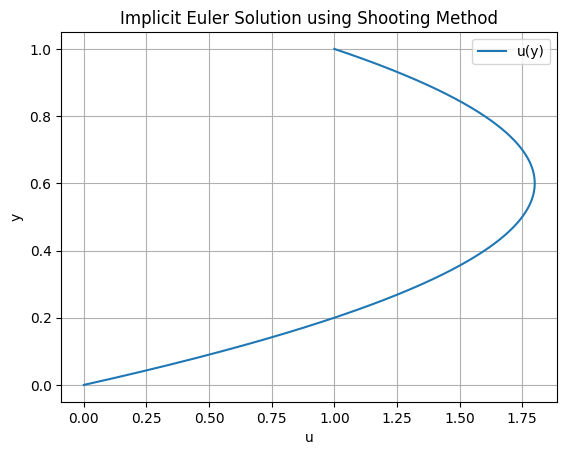

In [ ]:

# Shooting method to find initial derivative
def shooting(tol=1e-6, max_iter=100):
    # Initial guesses for y'(0)
    der_y_guess1, der_y_guess2 = 0, 10
    for i in range(max_iter):
        # Calculate y(1) using implicit_euler with each guess
        y_end1 = implicit_euler(y_0, der_y_guess1, P, 0, 1, 1000)
        y_end2 = implicit_euler(y_0, der_y_guess2, P, 0, 1, 1000)

        # Extend range if initial guesses are not bracketed
        if y_end1 > y_1_target:
            der_y_guess1 -= 10
            continue
        if y_end2 < y_1_target:
            der_y_guess2 += 10
            continue

        # Bisection method to refine the derivative guess
        der_y_guess = (der_y_guess1 + der_y_guess2) / 2
        y_end = implicit_euler(y_0, der_y_guess, P, 0, 1, 1000)

        # Check convergence
        if abs(y_end - y_1_target) < tol:
            return der_y_guess

        # Narrow down the bracket based on current guess
        if y_end < y_1_target:
            der_y_guess1 = der_y_guess
        else:
            der_y_guess2 = der_y_guess

    # Return final estimate if max_iter is reached without exact convergence
    return der_y_guess

# Solve using the computed initial derivative from shooting method
yprime_0 = shooting()
x, y = implicit_eulerr(y_0, yprime_0, P, 0, 1, 1000)

# Plotting
plt.plot( y[:, 0],x, label='u(y)')
plt.xlabel('u')
plt.ylabel('y')
plt.title("Implicit Euler Solution using Shooting Method")
plt.legend()
plt.grid()
plt.show()


Part B



$\begin{bmatrix}
-\frac{2}{\Delta x^2} & \frac{1}{\Delta x^2} & 0 & \cdots & 0 \\
\frac{1}{\Delta x^2} & -\frac{2}{\Delta x^2} & \frac{1}{\Delta x^2} & \cdots & 0 \\
0 & \frac{1}{\Delta x^2} & -\frac{2}{\Delta x^2} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & -\frac{2}{\Delta x^2}
\end{bmatrix}
$

In [ ]:
import numpy as np

def generate_tridiagonal(n, delta_x):
    a = np.zeros((n, n))
    a[np.arange(n), np.arange(n)] = -2 / (delta_x)**2
    a[np.arange(n - 1), np.arange(1, n)] = 1 / (delta_x)**2
    a[np.arange(1, n), np.arange(n - 1)] = 1 / (delta_x)**2
    a[0][0] = a[-1][-1] = 1
    a[0][1]=a[-1][-2]=0

    return a

n = 1000
delta_x=1/999
matrix = generate_tridiagonal(n,delta_x)
print(matrix)


[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 9.980010e+05 -1.996002e+06  9.980010e+05 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 0.000000e+00  9.980010e+05 -1.996002e+06 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.996002e+06
   9.980010e+05  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  9.980010e+05
  -1.996002e+06  9.980010e+05]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  1.000000e+00]]


In [ ]:
import numpy as np

def generate_b_vector(n, P):
    b = -P * np.ones((n, 1))
    b[0] = 0
    b[-1] = 1
    return b

n = 1000
b = generate_b_vector(n, P)
b

array([[  0.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-10.],
       [-1

In [ ]:
import numpy as np

def GEPP(A, b, doPivot=True):
    '''
    Gaussian elimination with partial pivoting.

    input: A is an n x n numpy matrix
           b is an n x 1 numpy array
    output: x is the solution of Ax=b
            with the entries permuted in
            accordance with the pivoting
            done by the algorithm
    post-condition: A and b have been modified.
    '''
    n = len(A)
    if b.size != n:
        raise ValueError("Invalid argument: incompatible sizes between"+
                         "A and b.", b.size, n)

    # Elimination
    for k in range(n-1):
        if doPivot:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                A[[k,maxindex]] = A[[maxindex, k]]
                b[[k,maxindex]] = b[[maxindex, k]]
        else:
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting doPivot to True.")

        # Eliminate
        for row in range(k+1, n):
            multiplier = A[row, k] / A[k, k]
            A[row, k:] = A[row, k:] - multiplier * A[k, k:]
            b[row] = b[row] - multiplier * b[k]

    # Back Substitution
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        x[k] = (b[k].item() - np.dot(A[k, k+1:n], x[k+1:n])) / A[k, k].item()
    return x


In [ ]:
u_vector=GEPP(matrix, b, doPivot = True)

plotting the graph between y-axis and solution values

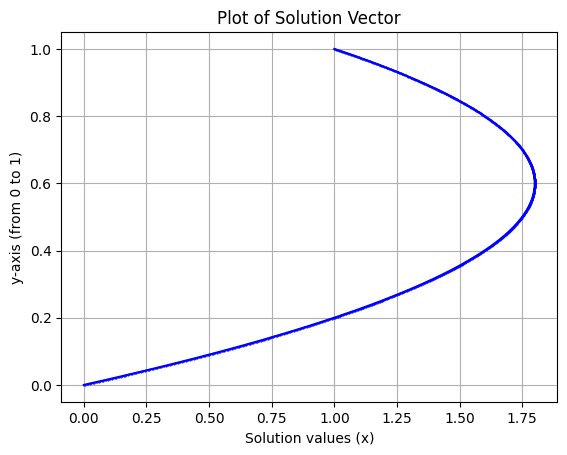

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = np.linspace(0, 1, n)
plt.plot(u_vector,y, marker='o', markersize=0.5, linestyle='-', color='b')
plt.ylabel("y-axis (from 0 to 1)")
plt.xlabel("Solution values (x)")
plt.title("Plot of Solution Vector")
plt.grid(True)
plt.show()